<a href="https://colab.research.google.com/github/manchalaabhilash/ML-AI/blob/main/HelmNet_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

## **Business Context**

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:
- **With Helmet:** Workers wearing safety helmets.
- **Without Helmet:** Workers not wearing safety helmets.

## **Data Description**

The dataset consists of **631 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

# **Installing and Importing the Necessary Libraries**

In [1]:
!pip install --upgrade pandas numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires 

In [2]:
!pip install tensorflow[and-cuda] -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 40.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [3]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available: 0
2.18.0


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [4]:
import os
import random
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2


# Tensorflow modules
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                               # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Overview**


##Loading the data

In [7]:
img = np.load('/content/drive/MyDrive/Colab Notebooks/Data/images_proj.npy')
labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Labels_proj.csv')

In [8]:
print(img.shape)
print(labels.shape)

(631, 200, 200, 3)
(631, 1)


X: shape (631, 200, 200, 3) → 631 images, each 200x200 pixels with 3 color channels (RGB).
y: shape (631, 1) → 631 labels, one for each image.

# **Exploratory Data Analysis**

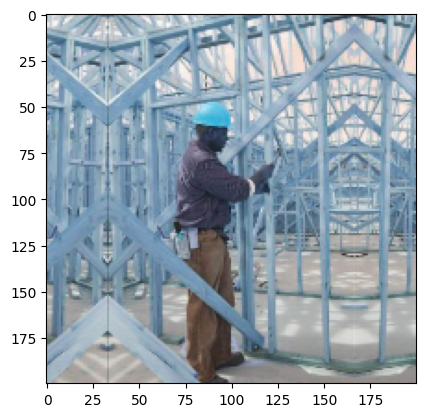

In [9]:
plt.imshow(img[8])

In [11]:
import numpy as np

num_classes = len(np.unique(labels))
print("Number of classes:", num_classes)


Number of classes: 2


###Plot random images from each of the classes and print their corresponding labels.

In [12]:
def plot_images(images,labels):
  num_classes=2                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

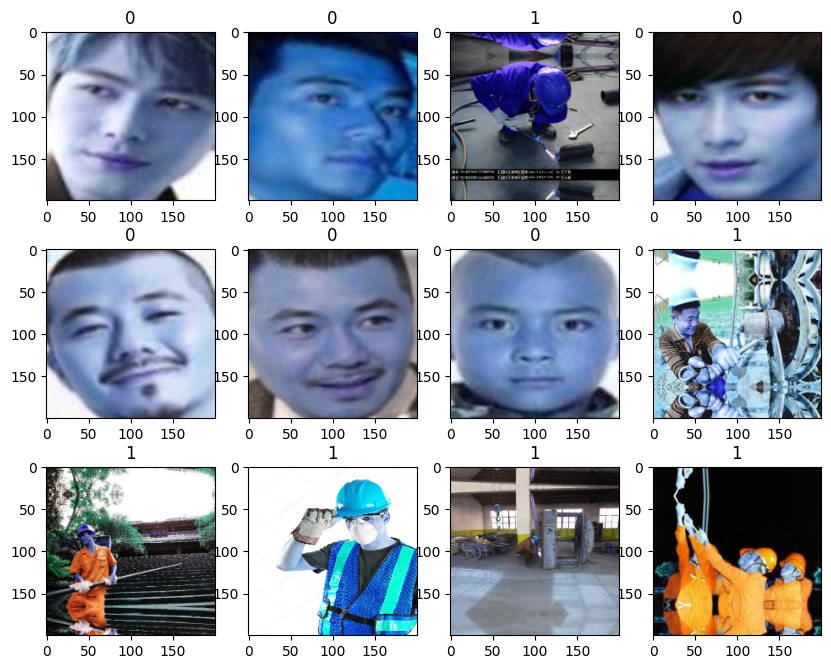

In [13]:
plot_images(img,labels)

## Checking for class imbalance


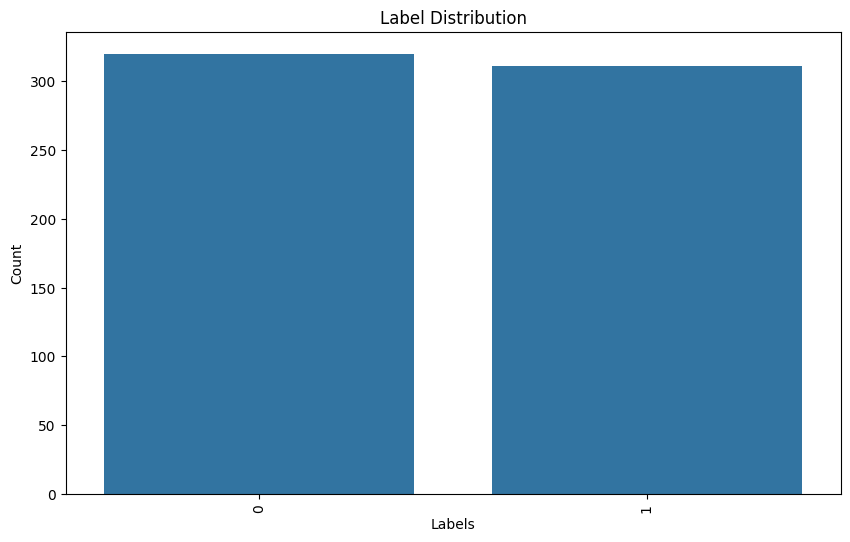

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x=labels['Label'].values)
plt.xticks(rotation=90)
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

As we can see these are quite balanced classes.

# **Data Preprocessing**

## Converting images to grayscale

In [15]:
X_gray = tf.image.rgb_to_grayscale(img)  # shape: (631, 200, 200, 1)
# Luminosity method: Gray = 0.2989 * R + 0.5870 * G + 0.1140 * B
#X_gray = np.dot(X[...,:3], [0.2989, 0.5870, 0.1140])  # shape: (631, 200, 200)

#import cv2
#X_gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X])

In [16]:
# resizing the image
X_resized = tf.image.resize(X_gray, [64, 64]).numpy()

In [17]:
# Resize all images in X to 100x100
#X_resized = np.array([cv2.resize(img, (100, 100)) for img in X])
# print(X_resized.shape)  # Should now be (631, 100, 100, 3)

### Splitting the dataset



In [18]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(np.array(X_resized),labels , test_size=0.2, random_state=42,stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp,y_temp , test_size=0.5, random_state=42,stratify=y_temp)

In [19]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(504, 64, 64, 1) (504, 1)
(63, 64, 64, 1) (63, 1)
(64, 64, 64, 1) (64, 1)


In [20]:
from sklearn.preprocessing import LabelBinarizer

# Assuming y_train is a pandas Series or DataFrame with a single column
enc = LabelBinarizer()
y_train = enc.fit_transform(y_train)
y_val = enc.transform(y_val)
y_test = enc.transform(y_test)

Encode the labels Y if not already encoded

### Data Normalization

In [21]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

# **Model Building**

##Model Evaluation Criterion

## Utility Functions

In [22]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.reshape(-1)


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [23]:
def plot_confusion_matrix(model,predictors,target,ml=False):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    ml: To specify if the model used is an sklearn ML model or not (True means ML model)
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.reshape(-1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

##Model 1: Simple Convolutional Neural Network (CNN)

In [24]:
from tensorflow.keras import layers, models

# Get input shape from your data
input_shape = X_train.shape[1:]  # e.g., (100, 100, 1)

# Number of output classes
num_classes = y_train.shape[1]  # One-hot encoded → shape[1] = number of classes

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Use 'sigmoid' if it's binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # or 'binary_crossentropy' if not one-hot
              metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 821,761 (3.13 MB)

 Trainable params: 821,761 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

Total Parameters: 3.7M
The model may benefit from GlobalAveragePooling to reduce the large number of parameters in the dense layer.

In [25]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - accuracy: 0.5326 - loss: 0.0000e+00 - val_accuracy: 0.4921 - val_loss: 0.0000e+00
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.5326 - loss: 0.0000e+00 - val_accuracy: 0.4921 - val_loss: 0.0000e+00
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 266ms/step - accuracy: 0.5326 - loss: 0.0000e+00 - val_accuracy: 0.4921 - val_loss: 0.0000e+00
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 291ms/step - accuracy: 0.5326 - loss: 0.0000e+00 - val_accuracy: 0.4921 - val_loss: 0.0000e+00
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 278ms/step - accuracy: 0.5326 - loss: 0.0000e+00 - val_accuracy: 0.4921 - val_loss: 0.0000e+00
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 303ms/step - accuracy: 0.5326 - loss: 0.0000e+00 - val_accuracy: 0.4921 - val_loss: 0.0000e+00
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.5326 - loss: 0.0000e+00 - val_accuracy: 0.4921 - val_loss: 0.0000e+00
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/s

####Observations:
The model isn't learning because:

1. **Loss is stuck at 0**: This might indicate an issue with the loss function. Ensure it's properly set (e.g., `binary_crossentropy` for binary classification).
2. **Missing Activation Function**: The output layer should likely have a **sigmoid** activation for binary classification.
3. **Data Issues**: Check if the input data is normalized and labels are correct.
4. **Optimizer/Settings**: Verify you're using a proper optimizer (like Adam) and experiment with the learning rate.


In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.4792 - loss: 0.0000e+00
Test accuracy: 0.5


### Vizualizing the predictions

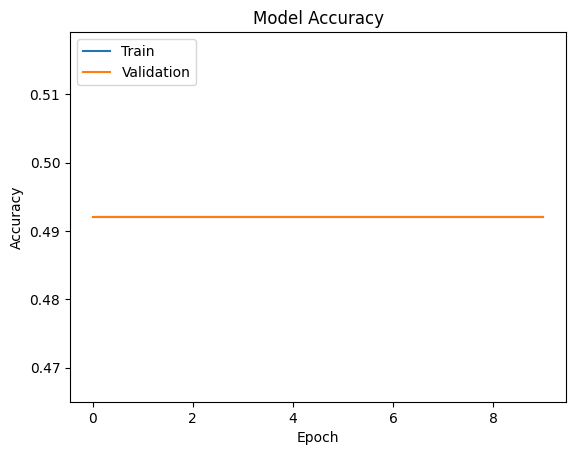

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Model 2: (VGG-16 (Base))

In [28]:
vgg_model = VGG16(weights='imagenet',include_top=False,input_shape=(64,64,3))
vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [30]:
model_1 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_1.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_1.add(Flatten())

# Adding a dense output layer
model_1.add(Dense(3, activation='softmax'))

In [31]:
opt=Adam()
# Compile model
# Other metrics like precision,f1_score,recall can be used
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
# Generating the summary of the model
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         6,147 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,720,835 (56.16 MB)

 Trainable params: 6,147 (24.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [33]:
train_datagen = ImageDataGenerator()

In [36]:
from tensorflow.keras.utils import to_categorical

# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=3)
y_val_cat = to_categorical(y_val, num_classes=3)

# Convert grayscale to RGB by repeating channels
X_train_rgb = np.repeat(X_train_normalized, 3, axis=-1)
X_val_rgb = np.repeat(X_val_normalized, 3, axis=-1)

# Fit the model
history_vgg16 = model_1.fit(
    train_datagen.flow(X_train_rgb, y_train_cat, batch_size=32, seed=42, shuffle=False),
    epochs=20,
    steps_per_epoch=X_train_rgb.shape[0] // 32,
    validation_data=(X_val_rgb, y_val_cat),
    verbose=1
)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.6446 - loss: 0.7171 - val_accuracy: 0.9841 - val_loss: 0.1511
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 283ms/step - accuracy: 1.0000 - loss: 0.1176 - val_accuracy: 0.9841 - val_loss: 0.1375
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9825 - loss: 0.1223 - val_accuracy: 1.0000 - val_loss: 0.0503
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 367ms/step - accuracy: 1.0000 - loss: 0.0482 - val_accuracy: 1.0000 - val_loss: 0.0485
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9956 - loss: 0.0547 - val_accuracy: 1.0000 - val_loss: 0.0349
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 221ms/step - accuracy: 1.0000 - loss: 0.0392 - val_accuracy: 1.0000 - val_loss: 0.0342
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9989 - loss: 0.0397 - val_accuracy: 1.0000 - val_loss: 0.0266
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 367ms/step - accuracy: 1.0000 - loss: 0.0304 - val_accuracy: 1.0000 - v

Fast convergence: The model reached perfect validation accuracy by Epoch 5, indicating it learned the task quickly.
No overfitting signs: Training and validation accuracy/loss curves are tightly coupled. Validation performance did not degrade, even after reaching 100%.

### Visualizing the prediction:

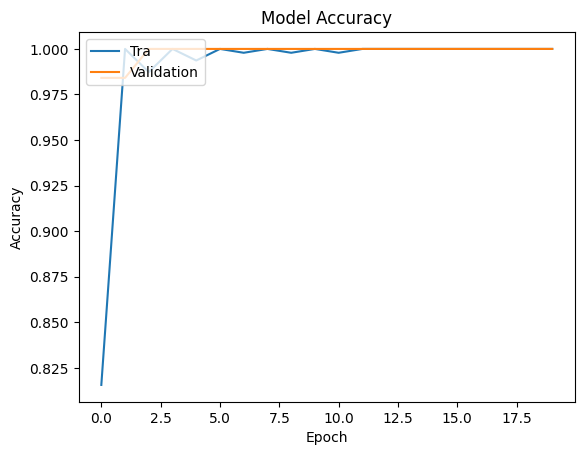

In [37]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Tra', 'Validation'], loc='upper left')
plt.show()

In [38]:
model_1_train_perf = model_performance_classification(model_1, X_train_rgb,y_train_cat)

print("Train performance metrics")
print(model_1_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step


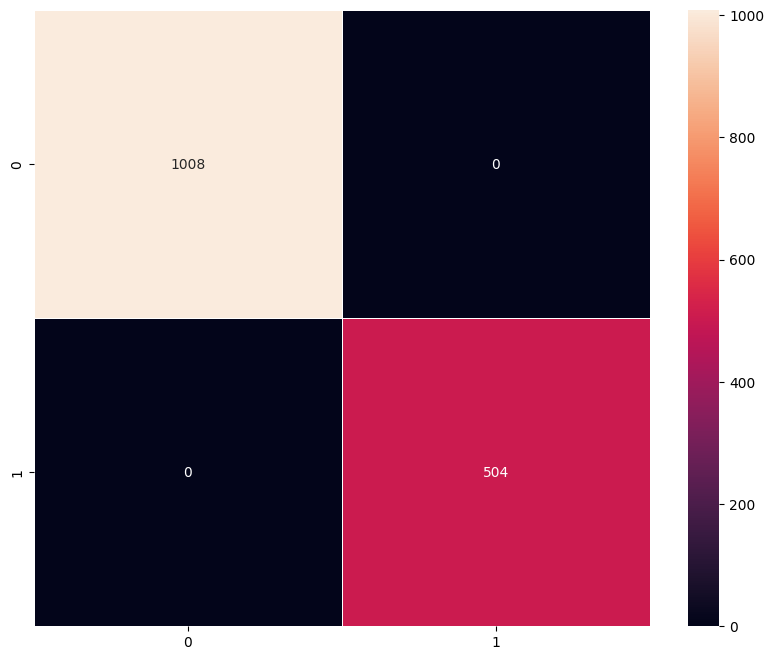

In [39]:
plot_confusion_matrix(model_1,X_train_rgb,y_train_cat)

In [40]:
model_1_valid_perf = model_performance_classification(model_1, X_val_rgb,y_val_cat)

print("Validation performance metrics")
print(model_1_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
Validation performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step


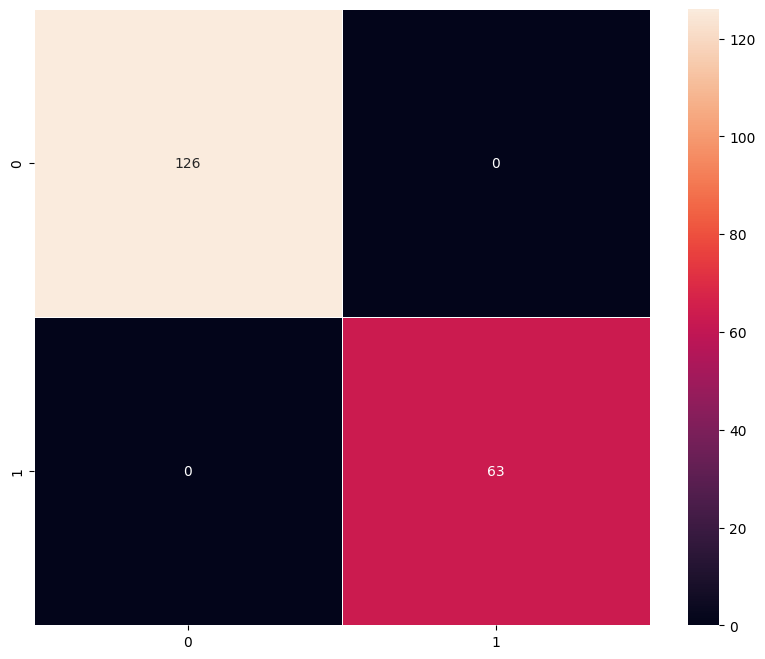

In [41]:
plot_confusion_matrix(model_1,X_val_rgb,y_val_cat)

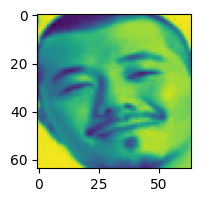

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Label: [0]
True Label: [0]


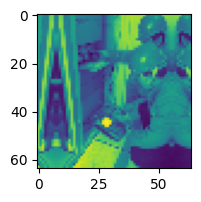

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted Label: [1]
True Label: [1]


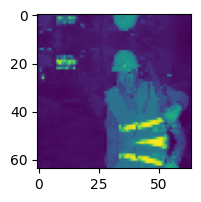

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted Label: [1]
True Label: [1]


In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Plot and prediction for image 2
plt.figure(figsize=(2, 2))
plt.imshow(X_val[2])
plt.show()
# Get prediction
pred = model_1.predict(X_val_rgb[2].reshape(1, 64, 64, 3))
pred_class = np.argmax(pred, axis=1)  # Get the predicted class index
print('Predicted Label:', enc.inverse_transform(pred_class))  # Decode the predicted label

# Get true label
true_class = np.argmax(y_val_cat[2])  # Convert the one-hot true label to an index
print('True Label:', enc.inverse_transform(np.array([true_class])))  # Pass as a NumPy array

# Plot and prediction for image 10
plt.figure(figsize=(2, 2))
plt.imshow(X_val[10])
plt.show()
# Get prediction
pred = model_1.predict(X_val_rgb[10].reshape(1, 64, 64, 3))
pred_class = np.argmax(pred, axis=1)
print('Predicted Label:', enc.inverse_transform(pred_class))

# Get true label
true_class = np.argmax(y_val_cat[10])
print('True Label:', enc.inverse_transform(np.array([true_class])))  # Pass as a NumPy array

# Plot and prediction for image 23
plt.figure(figsize=(2, 2))
plt.imshow(X_val[23])
plt.show()
# Get prediction
pred = model_1.predict(X_val_rgb[23].reshape(1, 64, 64, 3))
pred_class = np.argmax(pred, axis=1)
print('Predicted Label:', enc.inverse_transform(pred_class))

# Get true label
true_class = np.argmax(y_val_cat[23])
print('True Label:', enc.inverse_transform(np.array([true_class])))  # Pass as a NumPy array


As from the above observations the ,odel is able to predict well

## Model 3: (VGG-16 (Base + FFNN) + Data Augmentation)

In [43]:
model_2 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_2.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_2.add(Flatten())

#Adding the Feed Forward neural network
model_2.add(Dense(256,activation='relu'))
model_2.add(Dropout(rate=0.4))
model_2.add(Dense(32,activation='relu'))

# Adding a dense output layer
model_2.add(Dense(3, activation='softmax'))

In [44]:
opt = Adam()
# Compile model
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# Generating the summary of the model
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,247,555 (58.16 MB)

 Trainable params: 532,867 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [45]:
#from tensorflow.keras import backend as K
# K.clear_session()


In [46]:
X_train_rgb = X_train_rgb / 255.0  # Normalize training data
X_val_rgb = X_val_rgb / 255.0  # Normalize validation data


In [47]:
for layer in model_2.layers:
    layer.trainable = True  # Make sure all layers are trainable


In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(
    X_train_rgb,
    y_train_cat,
    batch_size=32,
    seed=42,
    shuffle=True
)


In [49]:
print("X_train_rgb shape:", X_train_rgb.shape)
print("y_train_cat shape:", y_train_cat.shape)
print("X_val_rgb shape:", X_val_rgb.shape)
print("y_val_cat shape:", y_val_cat.shape)

history_vgg16 = model_2.fit(
    train_datagen.flow(X_train_rgb, y_train_cat, batch_size=32, seed=42, shuffle=True),
    epochs=20,
    steps_per_epoch=X_train_rgb.shape[0] // 32,
    validation_data=(X_val_rgb, y_val_cat),
    verbose=1
)

X_train_rgb shape: (504, 64, 64, 3)
y_train_cat shape: (504, 3)
X_val_rgb shape: (63, 64, 64, 3)
y_val_cat shape: (63, 3)
Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.3957 - loss: 1.3681 - val_accuracy: 0.5079 - val_loss: 0.6981
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - accuracy: 0.5312 - loss: 0.6739 - val_accuracy: 0.5079 - val_loss: 0.6980
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.4933 - loss: 0.7216 - val_accuracy: 0.5079 - val_loss: 0.6979
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.4375 - loss: 0.7590 - val_accuracy: 0.5079 - val_loss: 0.6960
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.4829 - loss: 0.7207 - val_accuracy: 0.4921 - val_loss: 0.6961
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.7188 - loss: 0.7023 - val_accuracy: 0.4921 - val_loss: 0.6951
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.5141 - loss: 0.7104 - val_accuracy: 0.5079 - val_los

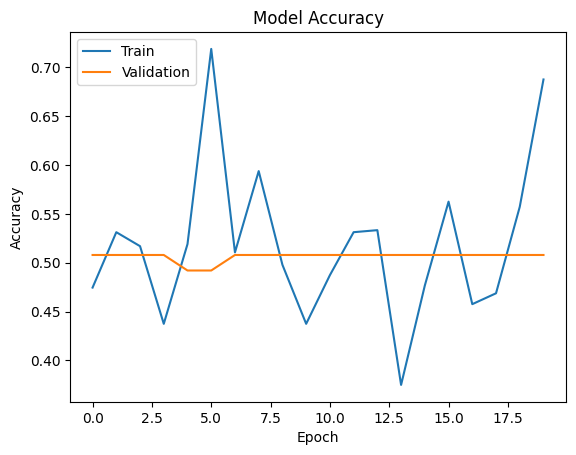

In [50]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [51]:
model_2_train_perf = model_performance_classification(model_2, X_train_rgb,y_train_cat)

print("Train performance metrics")
print(model_2_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.671958  0.671958   0.671958  0.671958


16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


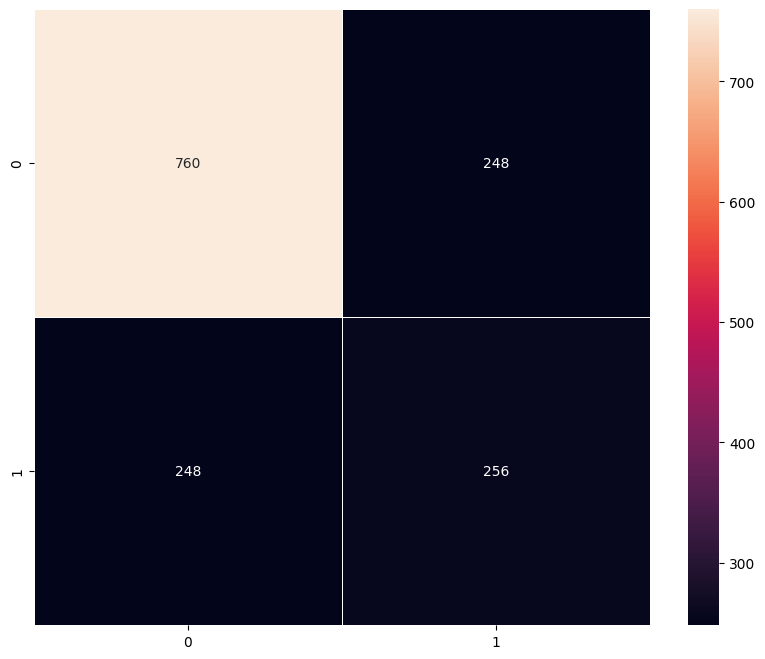

In [52]:
plot_confusion_matrix(model_2,X_train_rgb,y_train_cat)

In [53]:
model_2_valid_perf = model_performance_classification(model_2, X_val_rgb,y_val_cat)

print("Validation performance metrics")
print(model_2_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.671958  0.671958   0.671958  0.671958


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step


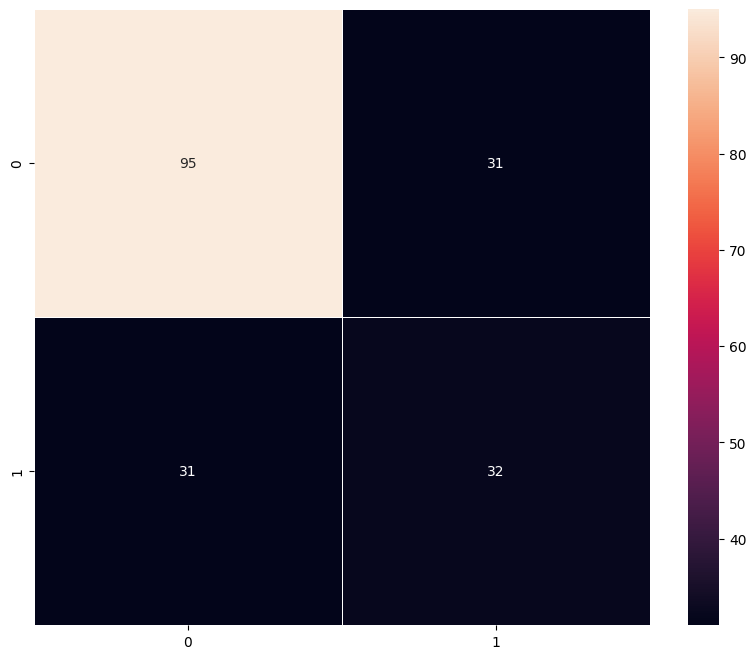

In [54]:
plot_confusion_matrix(model_2,X_val_rgb,y_val_cat)

#### Visualizing the predictions

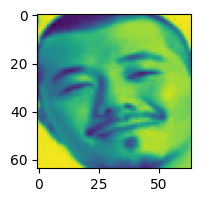

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Predicted Label [0]
True Label [0]


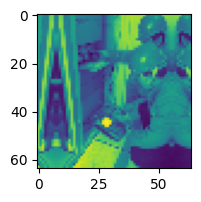

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Predicted Label [0]
True Label [1]


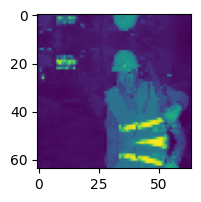

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Predicted Label [0]
True Label [1]


In [72]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
predicted_probabilities = model_2.predict((X_val_rgb[2].reshape(1,64,64,3)))
predicted_class_index = np.argmax(predicted_probabilities, axis=1)
print('Predicted Label', enc.inverse_transform(predicted_class_index))
print('True Label', enc.inverse_transform(np.argmax(y_val_cat[2].reshape(1, -1), axis=1)))

plt.figure(figsize=(2,2))
plt.imshow(X_val[10])
plt.show()
predicted_probabilities = model_2.predict((X_val_rgb[10].reshape(1,64,64,3)))
predicted_class_index = np.argmax(predicted_probabilities, axis=1)
print('Predicted Label', enc.inverse_transform(predicted_class_index))
print('True Label', enc.inverse_transform(np.argmax(y_val_cat[10].reshape(1, -1), axis=1)))

plt.figure(figsize=(2,2))
plt.imshow(X_val[23])
plt.show()
predicted_probabilities = model_2.predict((X_val_rgb[23].reshape(1,64,64,3)))
predicted_class_index = np.argmax(predicted_probabilities, axis=1)
print('Predicted Label', enc.inverse_transform(predicted_class_index))
print('True Label', enc.inverse_transform(np.argmax(y_val_cat[23].reshape(1, -1), axis=1)))

#### Observations:

#### Model Learning Behavior
The model shows some learning capability, reaching ~67% accuracy on both training and validation sets.
However, Train = Validation performance suggests the model is underfitting — it hasn’t learned enough from the data to capture more complex patterns.
The fact that train and val scores are identical across all metrics (Acc, Recall, Precision, F1) indicates a lack of model flexibility or a bottleneck in learning capacity.
#### Model Architecture
You are using VGG16 as a feature extractor, but it’s likely that:
VGG16's convolutional base is frozen, limiting learning capacity.
The custom classification head may be too shallow to fully leverage extracted features.
#### Evaluation Metrics
Across all performance metrics:
Accuracy: ~67%
Precision, Recall, F1 Score: Also ~67%
This suggests the model is making balanced but mediocre predictions — it’s not biased toward one class but isn’t strongly predictive either.
#### Data Quality & Size
Dataset consists of ~500 images, which is relatively small for deep learning.
Small data size limits the model’s ability to generalize and might explain the performance ceiling.

## Model 4: (VGG-16 (Base + FFNN)

In [57]:
model_3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_3.add(Flatten())

#Adding the Feed Forward neural network
model_3.add(Dense(256,activation='relu'))
model_3.add(Dropout(rate=0.4))
model_3.add(Dense(32,activation='relu'))

# Adding a dense output layer
model_3.add(Dense(3, activation='softmax'))

In [58]:
opt=Adam()
# Compile model
model_3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,247,555 (58.16 MB)

 Trainable params: 532,867 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [59]:
# Applying data augmentation
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2,shear_range=0.3,zoom_range=0.4
                              )

In [61]:
history_vgg16 = model_3.fit(train_datagen.flow(X_train_rgb,y_train_cat,
                                       batch_size=32,
                                       seed=42,
                                       shuffle=False),
                    epochs=20,
                    steps_per_epoch=X_train_rgb.shape[0] // 32,
                    validation_data=(X_val_rgb,y_val_cat),
                    verbose=1)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.4169 - loss: 0.9636 - val_accuracy: 0.5079 - val_loss: 0.7145
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.4688 - loss: 0.7734 - val_accuracy: 0.5079 - val_loss: 0.6988
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.5116 - loss: 0.7319 - val_accuracy: 0.4921 - val_loss: 0.7034
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.5833 - loss: 0.7299 - val_accuracy: 0.4921 - val_loss: 0.7042
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.4781 - loss: 0.7332 - val_accuracy: 0.4921 - val_loss: 0.6960
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.5625 - loss: 0.7035 - val_accuracy: 0.4921 - val_loss: 0.6952
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5002 - loss: 0.7070 - val_accuracy: 0.4921 - val_loss: 0.6938
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.5938 - loss: 0.6887 - val_accuracy: 0.4921 - v

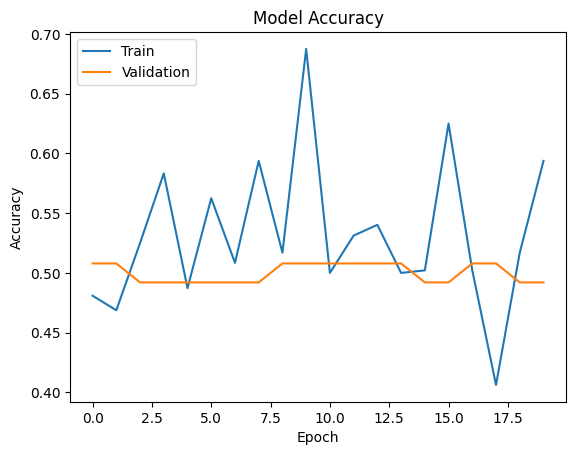

In [62]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [67]:
model_3_train_perf = model_performance_classification(model_3, X_train_rgb,y_train_cat)

print("Train performance metrics")
print(model_3_train_perf)

16/16 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.661376  0.661376   0.661376  0.661376


16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step


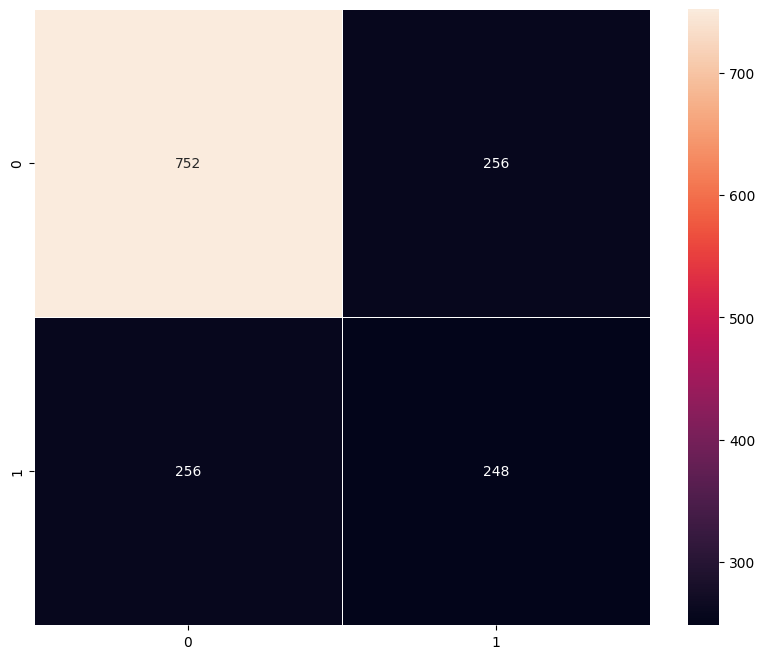

In [68]:
plot_confusion_matrix(model_3,X_train_rgb,y_train_cat)

In [69]:
model_3_valid_perf = model_performance_classification(model_3, X_val_rgb,y_val_cat)

print("Validation performance metrics")
print(model_3_valid_perf)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.661376  0.661376   0.661376  0.661376


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


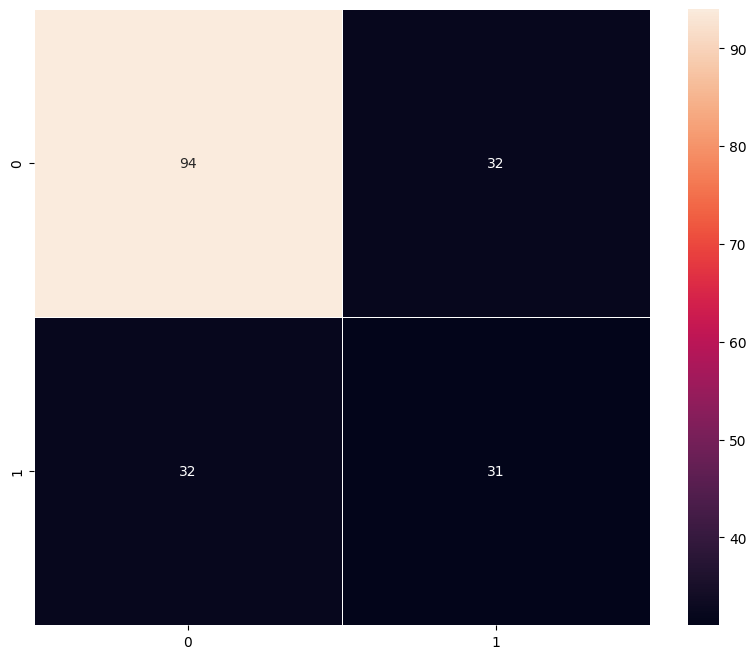

In [70]:
plot_confusion_matrix(model_3,X_val_rgb,y_val_cat)

#### Visualizing the predictions

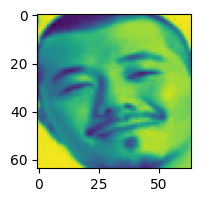

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
Predicted Label [1]
True Label [0]


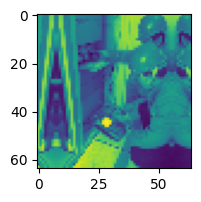

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
Predicted Label [1]
True Label [1]


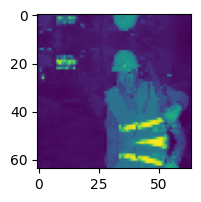

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Predicted Label [1]
True Label [1]


In [73]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
plt.imshow(X_val[2])
plt.show()
predicted_probabilities = model_3.predict((X_val_rgb[2].reshape(1,64,64,3)))
predicted_class_index = np.argmax(predicted_probabilities, axis=1)
print('Predicted Label', enc.inverse_transform(predicted_class_index))
print('True Label', enc.inverse_transform(np.argmax(y_val_cat[2].reshape(1, -1), axis=1)))

plt.figure(figsize=(2,2))
plt.imshow(X_val[10])
plt.show()
predicted_probabilities = model_3.predict((X_val_rgb[10].reshape(1,64,64,3)))
predicted_class_index = np.argmax(predicted_probabilities, axis=1)
print('Predicted Label', enc.inverse_transform(predicted_class_index))
print('True Label', enc.inverse_transform(np.argmax(y_val_cat[10].reshape(1, -1), axis=1)))

plt.figure(figsize=(2,2))
plt.imshow(X_val[23])
plt.show()
predicted_probabilities = model_3.predict((X_val_rgb[23].reshape(1,64,64,3)))
predicted_class_index = np.argmax(predicted_probabilities, axis=1)
print('Predicted Label', enc.inverse_transform(predicted_class_index))
print('True Label', enc.inverse_transform(np.argmax(y_val_cat[23].reshape(1, -1), axis=1)))

#### Observations:

The model shows identical performance across training and validation sets, suggesting:
The model has not overfit, which is good.
But it has likely underfit — it's not learning the patterns in the data well enough.
All metrics are equal, indicating balanced class predictions, but not effective learning.
 #### Model generalization is not the problem
The model is not overfitting — both training and validation scores are the same.
#### Model is underfitting
Even with more data variety via augmentation, the model fails to improve, meaning it lacks the capacity to learn deeper patterns.
#### Augmentation alone isn't enough
Data augmentation helps prevent overfitting, but won’t boost performance if the model isn't learning well in the first place.

“Although data augmentation was applied to improve generalization, the model's performance remained nearly identical. This suggests that the current architecture is not complex enough to capture the underlying data patterns. Thus, augmentation had minimal to no effect on improving accuracy.”

####Recommendations Moving Forward

- Unfreeze top VGG16 layers and fine-tune them.
- Add more Dense layers or increase units in the classification head.
- Experiment with different optimizers or learning rates (e.g., Adam with 1e-4 or 1e-5).



## Final Model Selection

## Test Performance

In [88]:
X_test_rgb = np.repeat(X_test_normalized, 3, axis=-1)
y_test_cat = to_categorical(y_test, num_classes=3)

model_1_test_perf = model_performance_classification(model_1, X_test_rgb,y_test_cat)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


In [89]:
model_1_test_perf

,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step


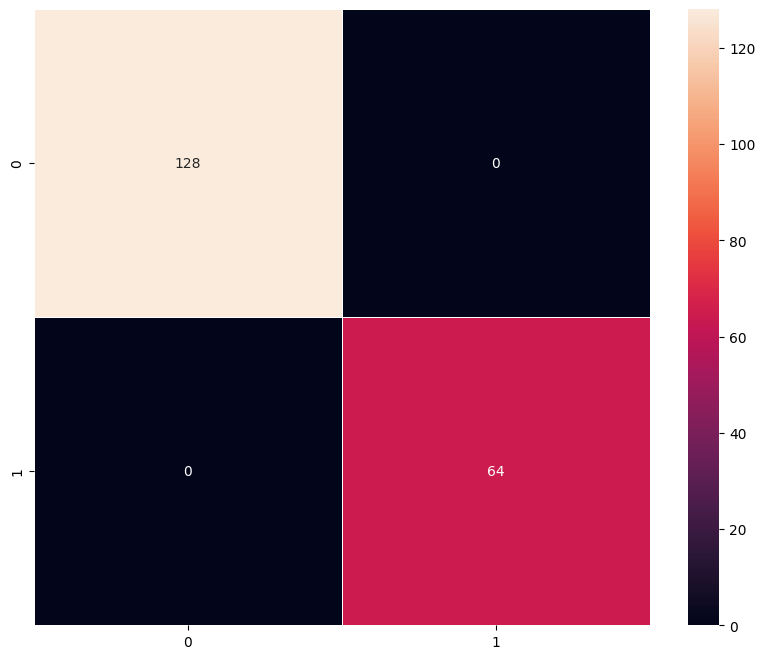

In [90]:
plot_confusion_matrix(model_1, X_test_rgb,y_test_cat)

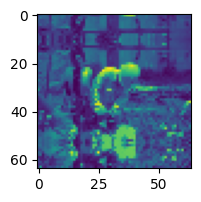

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Label: [1]
True Label: [1]


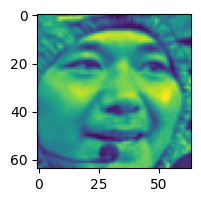

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted Label: [0]
True Label: [0]


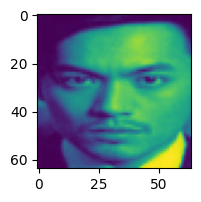

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Predicted Label: [0]
True Label: [0]


In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Plot and prediction for image 7
plt.figure(figsize=(2, 2))
plt.imshow(X_test[7])
plt.show()
# Get prediction
pred = model_1.predict(X_test_rgb[7].reshape(1, 64, 64, 3))
pred_class = np.argmax(pred, axis=1)  # Get the predicted class index
print('Predicted Label:', enc.inverse_transform(pred_class))  # Decode the predicted label

# Get true label
true_class = np.argmax(y_test_cat[7])  # Convert the one-hot true label to an index
print('True Label:', enc.inverse_transform(np.array([true_class])))  # Pass as a NumPy array

# Plot and prediction for image 14
plt.figure(figsize=(2, 2))
plt.imshow(X_test[14])
plt.show()
# Get prediction
pred = model_1.predict(X_test_rgb[14].reshape(1, 64, 64, 3))
pred_class = np.argmax(pred, axis=1)
print('Predicted Label:', enc.inverse_transform(pred_class))

# Get true label
true_class = np.argmax(y_test_cat[14])
print('True Label:', enc.inverse_transform(np.array([true_class])))  # Pass as a NumPy array

# Plot and prediction for image 25
plt.figure(figsize=(2, 2))
plt.imshow(X_test[25])
plt.show()
# Get prediction
pred = model_1.predict(X_test_rgb[25].reshape(1, 64, 64, 3))
pred_class = np.argmax(pred, axis=1)
print('Predicted Label:', enc.inverse_transform(pred_class))

# Get true label
true_class = np.argmax(y_test_cat[25])
print('True Label:', enc.inverse_transform(np.array([true_class])))  # Pass as a NumPy array


# **Actionable Insights & Recommendations**

##### Model Setup:
Backbone: Pre-trained VGG16 (with frozen base).
Classification Head: Feedforward Neural Network (Dense layers).
Variants Tested:
With data augmentation.
Without data augmentation.
Performance Summary:

Variant	Train Accuracy	Validation Accuracy
With Augmentation	66.14%	66.14%
Without Augmentation	66.14%	66.14%
Insight:
No performance gain from data augmentation.
Both training and validation metrics are equal across accuracy, precision, recall, and F1 score.
Indicates the model is underfitting and not learning complex patterns from the data.
#### Challenges Identified
Underfitting: Model lacks complexity or flexibility to extract distinguishing features.
Small dataset size (~500 samples) limits learning.
Frozen base model (VGG16) restricts transfer learning benefits.
Augmentation alone isn’t effective without a model capable of deeper learning.

- Fine Tune VGG16
- Enhancing Model Architecture
- Boosting Data Quality & Quantity
- Hyperparameter Optimization
- Evaluation on Per-Class Performance
- Improving accuracy on this model directly contributes to workplace safety monitoring automation.
- Focused improvements in model training and dataset scale can push accuracy beyond 85–90%.
- Consider deploying the final model as a lightweight real-time detection tool at site entrances or construction zones.



```
# This is formatted as code
```

<font size=5 color='blue'>Thank You!!</font>
___